In [23]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.pct import PCT
from utils.pca import PCA
from datasets import load_dataset
from utils.plotting import scatter

In [24]:
iris_data, iris_features = load_dataset.iris()

In [25]:
iris_data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
iris_pca = PCA(iris_features, iris_data["class"])
iris_projected = iris_pca.project(2)

iris_projected = iris_projected.sample(frac=1).reset_index(drop=True)

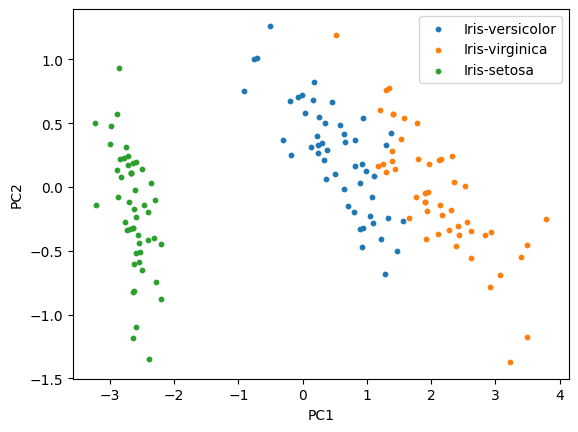

In [27]:
scatter(iris_projected, ["PC1", "PC2"], iris_projected["class"].unique(), 10)

In [28]:
values = iris_projected.sort_values("PC1").reset_index(drop=True).values
x_plot = values[:, 0]

In [42]:
labels = np.array([[-1 if c == "Iris-setosa" else 1 for c in iris_projected["class"]]]).T
iris_pct = PCT(2)
i = iris_pct.fit(iris_projected[["PC1", "PC2"]].values, labels, 0.2, 1000, 0.001)

print(i)
W = iris_pct.getW()
print(W)

5
[[2.60049905]
 [5.10438369]
 [2.80094779]]


In [43]:
(iris_pct.predict(iris_projected[["PC1", "PC2"]].values) == labels).sum()

150

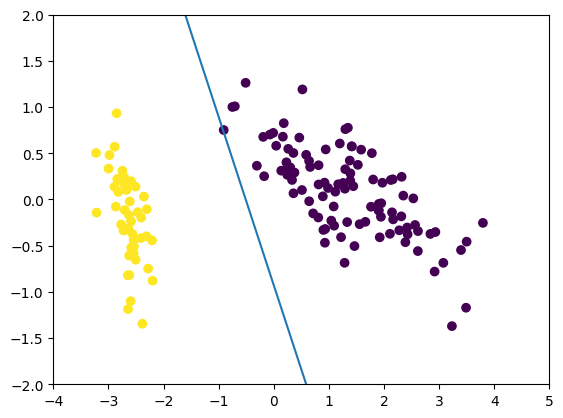

In [44]:
x = np.arange(-10, 10, 0.1)
y = -(W[0] + x * W[1])/W[2]
plt.plot(x, y)
plt.axis([-4, 5, -2, 2])
plt.scatter(iris_projected["PC1"], iris_projected["PC2"], c=[1 if c == "Iris-setosa" else -1 for c in iris_projected["class"]], cmap="viridis")

In [62]:
def multiclass_pct(data: pd.DataFrame, classes: pd.Series, plot_range: list = None):
  unique_label = classes.unique()

  new_class = classes
  for i, l in enumerate(unique_label):
    new_class = [i if l == c else c for c in new_class]

  if plot_range is None:
    plot_range = [-10, 10, -10, 10]

  Ws: list[np.ndarray] = []

  for classify_label in unique_label:
    new_labels = [1 if l == classify_label else -1 for l in classes]
    print(new_labels)
    pct = PCT(2)
    pct.fit(data.values, new_labels, 0.2, 1000)
    Ws.append(pct.getW())

  x = np.arange(plot_range[0], plot_range[1], 0.1)
  print(Ws)
  for i, W in enumerate(Ws):
    y = -(W[0] + x*W[1])/W[2]
    plt.plot(x, y, label=f"{unique_label[i]} from the rest")
  
  plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=new_class, cmap="viridis")
  plt.axis(plot_range)
  plt.legend()
  plt.show()

[1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1

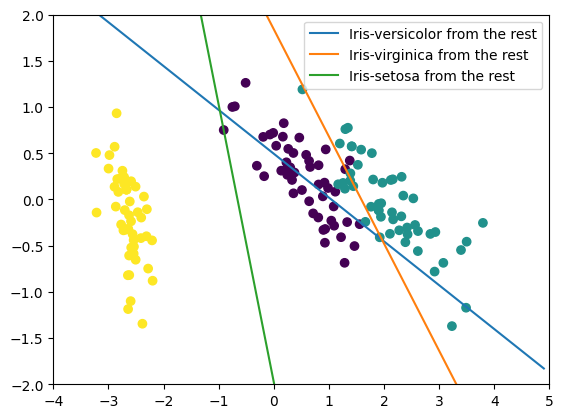

In [63]:
multiclass_pct(iris_projected[["PC1", "PC2"]], iris_projected["class"], [-4, 5, -2, 2])

In [59]:
len(iris_projected["class"].unique())

3